Exercícios de Revisão A2
--
Professor: Renato Rocha Souza  
--

In [196]:
import itertools
import random
from collections import Counter
import re

import pymysql
import sqlite3
import getpass
import string

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas.io.sql as psql

%matplotlib inline

### Parte I - Pandas

Para o Dataframe abaixo, resolva as seguintes tarefas:

In [4]:
df_zoo = pd.read_csv('../Dados/zoo.csv')
df_zoo.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


1 - Crie uma série somente com os nomes dos animais (primeira coluna)

In [5]:
df_zoo['animal']

0      aardvark
1      antelope
2          bass
3          bear
4          boar
5       buffalo
6          calf
7          carp
8       catfish
9          cavy
10      cheetah
11      chicken
12         chub
13         clam
14         crab
15     crayfish
16         crow
17         deer
18      dogfish
19      dolphin
20         dove
21         duck
22     elephant
23     flamingo
24         flea
25         frog
26         frog
27     fruitbat
28      giraffe
29         girl
         ...   
71         rhea
72     scorpion
73     seahorse
74         seal
75      sealion
76     seasnake
77      seawasp
78      skimmer
79         skua
80     slowworm
81         slug
82         sole
83      sparrow
84     squirrel
85     starfish
86     stingray
87         swan
88      termite
89         toad
90     tortoise
91      tuatara
92         tuna
93      vampire
94         vole
95      vulture
96      wallaby
97         wasp
98         wolf
99         worm
100        wren
Name: animal, Length: 10

2 - Transforme os campos com as strings "True"/"False" em variáveis booleanas True/False  
Veja as dicas [aqui](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) e [aqui](https://stackoverflow.com/questions/49259580/replace-values-in-a-pandas-series-via-dictionary-efficiently)

In [6]:
newone=df_zoo
newone

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
5,buffalo,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
6,calf,True,False,False,True,False,False,False,True,True,True,False,False,4,True,True,True,mammal
7,carp,False,False,True,False,False,True,False,True,True,False,False,True,0,True,True,False,fish
8,catfish,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
9,cavy,True,False,False,True,False,False,False,True,True,True,False,False,4,False,True,False,mammal


In [7]:
del newone['type']

In [8]:
newone.applymap(lambda x: True if x == True else False)

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,False,True,False,False,True,False,False,True,True,True,True,False,False,False,False,False,True
1,False,True,False,False,True,False,False,False,True,True,True,False,False,False,True,False,True
2,False,False,False,True,False,False,True,True,True,True,False,False,True,False,True,False,False
3,False,True,False,False,True,False,False,True,True,True,True,False,False,False,False,False,True
4,False,True,False,False,True,False,False,True,True,True,True,False,False,False,True,False,True
5,False,True,False,False,True,False,False,False,True,True,True,False,False,False,True,False,True
6,False,True,False,False,True,False,False,False,True,True,True,False,False,False,True,True,True
7,False,False,False,True,False,False,True,False,True,True,False,False,True,False,True,True,False
8,False,False,False,True,False,False,True,True,True,True,False,False,True,False,True,False,False
9,False,True,False,False,True,False,False,False,True,True,True,False,False,False,False,True,False


3 - Crie um novo dataframe somente com os Mamíferos

In [9]:
df_zoo = pd.read_csv('../Dados/zoo.csv')
df_zoo.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


In [10]:
df_zoo[df_zoo.type=='mammal']

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
5,buffalo,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
6,calf,True,False,False,True,False,False,False,True,True,True,False,False,4,True,True,True,mammal
9,cavy,True,False,False,True,False,False,False,True,True,True,False,False,4,False,True,False,mammal
10,cheetah,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
17,deer,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
19,dolphin,False,False,False,True,False,True,True,True,True,True,False,True,0,True,False,True,mammal


4 - Crie um gráfico com os números de patas por animais  
Veja as dicas [aqui](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.html)  

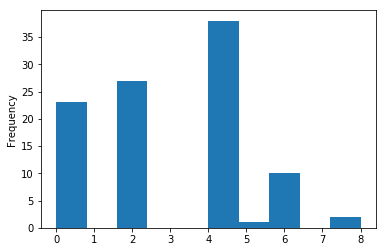

In [11]:
df_zoo.legs.plot(kind='hist')

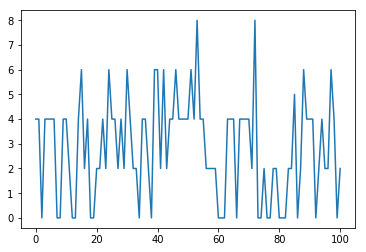

In [12]:
df_zoo.legs.plot()

5 - crie uma tabela no banco alunos a partir do dataframe  
ver referência [aqui](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html)

In [13]:
p = getpass.getpass()
conn = pymysql.connect(host='127.0.0.1', #localhost
                       port=3306, 
                       user='aluno', 
                       passwd=p, 
                       db='alunos')

········


In [14]:
sqltipo=df_zoo.to_sql
sqltipo

<bound method NDFrame.to_sql of        animal   hair  feathers   eggs   milk  airborne  aquatic  predator  \
0    aardvark   True     False  False   True     False    False      True   
1    antelope   True     False  False   True     False    False     False   
2        bass  False     False   True  False     False     True      True   
3        bear   True     False  False   True     False    False      True   
4        boar   True     False  False   True     False    False      True   
5     buffalo   True     False  False   True     False    False     False   
6        calf   True     False  False   True     False    False     False   
7        carp  False     False   True  False     False     True     False   
8     catfish  False     False   True  False     False     True      True   
9        cavy   True     False  False   True     False    False     False   
10    cheetah   True     False  False   True     False    False      True   
11    chicken  False      True   True  False

### Parte 2 - Shell Linux

Usando comandos do Shell, abra o arquivo ../Dados/DomCasmurroMachadoAssis.txt e resolva as seguintes tarefas:

1 - Ordene as palavras do texto nas formas abaixo:
+ ordem ascii
+ ordem alfabética
+ ordem de "rima"

In [ ]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | LC_ALL=C sort |uniq

In [16]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | sort |uniq


]
a
A
ab
abafadas
abafado
abafando
abafava
abahuladas
abaixo
Abaixo
abaixou
abalo
abalou
abanando
abanava
abandone
Abane
abanou
abarcar
abatida
abatido
abatimento
Abel
aben
aberra
aberta
abertas
aberto
abertos
abide
abobada
abolir
abomina
abominaveis
aborrece
aborrecem
aborrecer
aborreciamos
aborrecida
aborrecido
aborrecimento
aborrecivel
abortado
abotoada
abotoado
abotoe
about
About
abr
abra
Abrah
abre
Abre
abreviado
abri
Abri
abria
abrigado
abril
Abril
Abrimos
abrindo
abrir
abrira
abrissemos
abriu
abrochado
abrochou
absoluta
absolutamente
absolve
absolvi
absolvido
abusa
abusava
abuso
abysmo
ac
acab
acaba
acabada
acabadas
acabado
acabam
acabando
acabar
acabaram
acabaria
acabas
acabasse
acabassem
acabava
acabavam
acabei
Acabei
Acabemos
acabo
acabou
Acabou
ACADEMIA
acalcanhados
acanhada
acanhado
acanhamento
acaso
Acaso
acceit
acceita
acceital
acceitando
acceitar
acceitasse
acceitei
Acceitei
acceito
Acceito
acceitou
accender
accendesse
accendeu
accendi
accendia
accendou
accentuando
acce

cerrava
Cerrava
Cert
certa
Certa
certain
certamente
certas
certeza
certid
certificar
certo
Certo
certos
Certos
Cesar
cessando
cessaram
cessavam
ceu
CEZAR
ch
chacara
chacarinha
chala
chale
chama
chamada
chamado
Chamado
chamados
chamal
chamam
chamando
chamar
chamaram
chamasse
chamassem
chamava
Chamava
chame
chamei
Chamem
chames
Chamo
chamou
change
chap
chapeu
charada
charge
charges
charitable
charities
charlat
charuto
chave
chaves
check
checks
chefe
cheg
chega
Chega
chegada
chegado
chegam
Chegam
chegando
Chegando
chegar
chegara
Chegara
chegaram
chegaremos
chegasse
chegava
chegavam
chego
chegou
Chegou
chegue
Chegue
cheguei
Cheguei
cheia
cheias
cheio
cheios
cheiram
Cheiram
cheirando
cheirar
cheiravam
cheiro
Chianti
chicara
chicote
Chief
chilrear
chinellas
chins
chita
chitas
chocarreira
chocha
choose
chor
chora
Chora
choraes
chorando
chorar
choraria
chorasse
chorava
choravam
chore
chorei
chorem
choro
chorou
Chorou
chovendo
chovesse
choveu
chovia
choviam
christ
chronologia
chronologicamente


LXXXVII
LXXXVIII
m
M
Macbeth
Machado
MACHADO
Machinalmente
machine
machucar
machucou
macia
macula
made
madrinha
madrugada
madurera
maduro
mae
maestro
magia
magnificencia
magnifico
magoa
magoou
magra
magricella
magro
mail
mailing
main
maintaining
maio
maior
maiores
Maioridade
mais
Mais
Majestade
make
makes
mal
Mal
mala
maldito
males
malicia
maluca
maluquice
maluquices
mam
Mam
mamar
mana
Mana
manchado
mand
manda
Manda
mandada
mandamento
mandando
mandar
Mandar
mandara
Mandaram
mandariam
mandasse
mandassem
mandava
mande
Mande
mandei
Mandei
mandem
Mandem
mando
Mando
Manduca
maneira
maneiras
mangas
manh
manha
manifesta
mano
Mano
mansa
mansas
manso
mantenho
manter
manteve
mantilha
mantimento
Manual
manuscripta
manuscripto
many
Many
mar
Mar
Marc
marcadas
marcado
marcando
marcha
marchetado
Marcolini
marcou
mares
marfim
Maria
marias
maricas
marido
maridos
marinha
marisca
marked
marmore
marquei
marqueza
Marte
marujo
mas
Mas
mascate
massas
Massinissa
Mastai
mastigado
mata
Matacavallos
matadores
ma

Tinha
tinham
Tinham
tinhamos
Tinhamos
tinir
tinta
tinteiro
tio
Tio
tique
tirada
tirado
tiral
tiram
tirando
tirar
tiraram
tirarem
tirasse
tirava
tirei
Tirei
tiro
tirou
tisica
Title
titulo
tive
Tive
tivemos
Tivemos
tiver
tivera
tiveram
tivesse
tivessem
tiveste
tm
to
To
TO
toa
toada
toc
toca
tocadas
tocado
tocando
tocar
tocaria
tocava
tocavamos
tocha
tochas
toda
Toda
todas
Todas
Todavia
todo
Todo
todos
Todos
toga
tolerava
tolheu
tolhia
tolices
tom
Tom
toma
Toma
tomam
tomando
tomar
tomara
tomaram
Tomaremos
tomava
tomavam
tomei
tomo
tomou
tona
tonta
tontinha
tonto
toque
toquei
tormentos
torna
tornando
tornar
tornaram
tornaria
Tornariam
tornariamos
tornava
tornavam
tornavamos
torne
tornei
Tornei
torno
tornou
torpe
torpes
torre
torto
tosca
tosse
tossesinha
tossir
total
totalidade
totalmente
touca
toucador
trabalhada
trabalhado
trabalhador
trabalhar
trabalharei
trabalhava
Trabalhava
trabalhavam
Trabalhei
trabalho
trabalhos
trademark
Trademark
TRADEMARK
tradi
traduzida
traduzido
tragar
tragedia

In [17]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' | rev | sort | rev | uniq


]
a
A
acaba
saiba
amba
emba
barba
Corityba
ca
fraca
casaca
sobrecasaca
ressaca
pataca
vacca
secca
bocca
rabeca
Bibliotheca
boneca
dedica
fatidica
indica
fica
Fica
significa
gratifica
scientifica
justifica
logica
seraphica
philosophica
encyclica
catholica
Catholica
plica
treplica
explica
Explica
polemica
astronomica
Monica
unica
communica
rica
America
Rhetorica
tisica
musica
physica
metaphysica
dramatica
pratica
prophetica
arithmetica
poetica
politica
critica
identica
botica
ecclesiastica
fantastica
mystica
therapeutica
banca
creanca
branca
franca
nunca
Nunca
boca
troca
toca
voca
Voca
evoca
equivoca
cerca
perca
forca
casca
fresca
risca
marisca
tosca
educa
Manduca
Tijuca
maluca
nuca
pouca
touca
da
Da
DA
ada
acabada
abobada
cada
Cada
achacada
complicada
pancada
cincada
cocada
cercada
escada
dada
assobradada
mandada
prendada
guardada
mudada
lisongeada
creada
fada
almofada
socegada
chegada
obrigada
castigada
zangada
engasgada
madrugada
trabalhada
palhada
atrapalhada
enxovalhada
embrulhada


E
cae
mae
pae
Pae
papae
Papae
distrae
sae
vae
Vae
be
BE
cabe
Cabe
sabe
bebe
recebe
subscribe
transcribe
aljube
Aljube
soube
ce
face
place
replace
conhece
comece
parece
Parece
apparece
merece
esmorece
aborrece
esquece
Esquece
crendice
INDICE
golodice
office
velhice
apolice
meninice
casmurrice
notice
NOTICE
maluquice
Service
accordance
compliance
Compliance
lance
relance
romance
assistance
NEGLIGENCE
essence
sentence
precoce
doce
voce
Voce
disfarce
nasce
cresce
accresce
produce
de
De
DE
edade
sociedade
piedade
solidariedade
propriedade
idade
vaidade
cidade
Cidade
capacidade
veracidade
felicidade
cumplicidade
mocidade
velleidade
realidade
formalidade
banalidade
naturalidade
totalidade
qualidade
casualidade
espiritualidade
rivalidade
fidelidade
infidelidade
debilidade
possibilidade
volubilidade
facilidade
docilidade
utilidade
tranquillidade
incredulidade
intimidade
Intimidade
enfermidade
ancianidade
serenidade
dignidade
infinidade
interinidade
paternidade
eternidade
opportunidade
caridade


Suburbios
exercicios
officios
sacrificios
supplicios
patricios
vicios
silencios
nuncios
internuncios
negocios
sestercios
remedios
predios
tedios
suicidios
fugidios
compendios
episodios
feios
cheios
meios
recreios
passeios
fios
privilegios
elogios
relogios
premios
arrepios
rios
comprimarios
canarios
extraordinarios
seminarios
diccionarios
honorarios
contrarios
commentarios
varios
sombrios
improperios
mysterios
suspensorios
oratorios
proprios
navios
Jos
desejos
beijos
rijos
anjos
arranjos
regalos
pelos
cavallos
Matacavallos
intervallos
bellos
cabellos
castellos
tranquillos
Tijolos
polos
apostolos
exemplos
explos
espectaculos
seculos
vehiculos
versiculos
calculos
circulos
musculos
opusculos
incredulos
famulos
condiscipulos
capitulos
mos
amos
Suspendamos
digamos
Digamos
nhamos
Venhamos
tinhamos
Tinhamos
vinhamos
Ponhamos
iamos
Iamos
bebiamos
subiamos
conheciamos
aborreciamos
desciamos
pediamos
prendiamos
podiamos
Podiamos
perdiamos
acudiamos
affligiamos
liamos
riamos
fariamos
tornariamos
e

2 - Quantas palavras maiúsculas distintas há no texto?

In [507]:
!tr -sc '[A-Z][a-z]' '[\012*]' < ../Dados/DomCasmurroMachadoAssis.txt | grep '^[A-Z]\{1,\}$' | sort -u | wc-l

/bin/sh: 1: wc-l: not found
sort: fflush failed: 'standard output': Broken pipe
sort: write error


3 - Quantas palavras há com apenas uma, com apenas duas, e com apenas 3 vogais?

In [494]:
#1 vogal
!tr -sc '[A-Z][a-z]' '[\012*]' < ../Dados/DomCasmurroMachadoAssis.txt | grep '[aeiouAEIOU]\{1\}'| sort -u | wc -l

9958


In [20]:
!tr -sc '[A-Z][a-z]' '[\012*]' < ../Dados/DomCasmurroMachadoAssis.txt | grep '[aeiouAEIOU]\{2\}' | sort -u | wc -l

3191


In [21]:
!tr -sc '[A-Z][a-z]' '[\012*]' < ../Dados/DomCasmurroMachadoAssis.txt | grep '[aeiouAEIOU]\{3\}' | sort -u | wc -l

260


4 - Qual a sequência de comandos para criar um arquivo com os bigramas e suas contagens?

In [22]:
!tr -sc '[A-Z][a-z]' '[\012*]' < ../Dados/DomCasmurroMachadoAssis.txt | grep '[A-Z][A-Z]' | sort -u | wc -l :


wc: ':': No such file or directory
sort: fflush failed: 'standard output': Broken pipe
sort: write error


In [481]:
! cat ../Dados/DomCasmurroMachadoAssis.txt | tr -sc '[A-Z][a-z]' '[\012*]' > ../Dados/DomCasmurroMachadoAssis.words
! tail -n+2 ../Dados/DomCasmurroMachadoAssis.words > ../Dados/DomCasmurroMachadoAssis.nextwords

In [483]:
! paste ../Dados/DomCasmurroMachadoAssis.words ../Dados/DomCasmurroMachadoAssis.nextwords | sed 30q

	The
The	Project
Project	Gutenberg
Gutenberg	EBook
EBook	of
of	Dom
Dom	Casmurro
Casmurro	by
by	Machado
Machado	de
de	Assis
Assis	This
This	eBook
eBook	is
is	for
for	the
the	use
use	of
of	anyone
anyone	anywhere
anywhere	in
in	the
the	United
United	States
States	and
and	most
most	other
other	parts
parts	of
of	the
paste: write error: Broken pipe
paste: write error


### Parte 3 - Expressões Regulares

1 - Repita os exercícios 1 a 4 da parte 2 utilizando Python

In [194]:
with open('../Dados/DomCasmurroMachadoAssis.txt', 'r', encoding='utf-8') as f:
    texto = f.read()

In [197]:
maiusculas=re.findall(r'\b[A-Z]+\b',texto)
maiusculas= {p.strip(string.punctuation)for p in maiusculas}
maiusculas= {p.strip('\n') for p in maiusculas}
maiusculas= {p.strip('\ufeff') for p in maiusculas}
maiusculas= {p.strip(' ') for p in maiusculas}
len(maiusculas)

280

In [209]:
uma_vogal=re.findall(r'\b[^eiouAEIOU àáãâóõôíúéêÁÉÍÓÚÂÊÔ]*[eiouAEIOUáãâóõôíúéêÁÉÍÓÚÂÊÔ][^eiouAEIOU áãâóõôíúéêÁÉÍÓÚÂÊÔ]*\b',texto)
L1_vogal=[p.strip(string.punctuation)for p in uma_vogal]
L1_vogal=[p.strip('\n')for p in L1_vogal]
L1_vogal=[p.strip(' ')for p in L1_vogal]
len(L1_vogal)

29721

In [214]:
duas_vogal = re.findall(r'\b[^aeiouAEIOU áãóõôíúéê]*[aeiouAEIOUáàãóõôíúéê][^aeiouAEIOUáàãóõôíúéê ]*[aeiouAEIOUáàãóõôíúéê][^aeiouAEIOU áãóõôíúéê]*\b',texto)
L2_vogal=[p.strip(string.punctuation)for p in duas_vogal]
L2_vogal=[p.strip('\n')for p in L2_vogal]
L2_vogal=[p.strip(' ')for p in L2_vogal]
len(L2_vogal)

25264

In [222]:
tres_vogal = re.findall(r'\b[^aeiouAEIOU áãóõôíúéê]*[aeiouAEIOUáàãóõôíúéê][^aeiouAEIOU áãóõôíúéê]*[aeiouAEIOUáàãóõôíúéê][^aeiouAEIOUáàãóõôíúéê ]*[aeiouAEIOUáàãóõôíúéê][^aeiouAEIOU áãóõôíúéê]*\b',texto)
L3_vogal=[p.strip(string.punctuation)for p in tres_vogal]
L3_vogal=[p.strip('\n')for p in L3_vogal]
L3_vogal=[p.strip(' ')for p in L3_vogal]
L3_vogal[0:3]

['Gutenberg', 'EBook', 'Casmurro']

In [223]:
TEXTO=texto.replace('\n',' ')
real_bigramas=re.findall(r'\w+\s\w+',TEXTO)
real_bigramas={p.lower().strip(string.punctuation)for p in real_bigramas}
real_bigramas
dicion={}
TEXTO=TEXTO.lower()
for b in real_bigramas:
    dicion[b]=TEXTO.count(b)
dicion

{'intima ao': 1,
 'obstinação que': 1,
 'mas nos': 2,
 'mim mordendo': 1,
 'torna justamente': 1,
 'não annuncia': 1,
 'compendios de': 1,
 'distingui mais': 1,
 'desde o': 4,
 'poder de': 4,
 'nos deu': 1,
 'preciso para': 1,
 'achava feio': 1,
 'hora foi': 2,
 'mas tão': 5,
 'excedem os': 1,
 'feixe de': 2,
 'se acabasse': 3,
 'trinta seculos': 1,
 'conclusão final': 1,
 'acabou em': 1,
 'ouvir por': 1,
 'a falar': 20,
 'você desembaraça': 1,
 'cançadas ou': 1,
 'a differença': 6,
 'de resolver': 1,
 'sinhô nadando': 1,
 'amigas que': 4,
 'não descrevo': 1,
 'os morros': 1,
 'que louvasse': 1,
 'segundo cumpria': 1,
 'com paciencia': 1,
 'employees expend': 1,
 'mal pude': 2,
 'work or': 4,
 'chegando á': 1,
 'escola de': 4,
 'aliás não': 1,
 'vagam ente': 1,
 'tratamento de': 1,
 'um pae': 2,
 'que separar': 1,
 'casa achava': 1,
 'della é': 2,
 'do duas': 1,
 'collo e': 1,
 'os escravos': 4,
 'vinham do': 1,
 'uma comparação': 3,
 'o teve': 3,
 'proprietary form': 1,
 'não juro': 1

### Parte 4 - Bancos de dados

In [57]:
p = getpass.getpass()
conn = pymysql.connect(host='127.0.0.1', #localhost
                       port=3306, 
                       user='aluno', 
                       passwd=p, 
                       db='SQLExample1')
cur = conn.cursor()

········


In [58]:
cur.execute('use SQLExample1;')
cur.execute('show tables;')
for r in cur.fetchall():
    print(r)

('account',)
('branch',)
('business',)
('customer',)
('department',)
('employee',)
('individual',)
('officer',)
('product',)
('product_type',)
('transaction',)


In [26]:
cur.execute('describe account;')
for r in cur.fetchall():
    print(r)

('account_id', 'int(10) unsigned', 'NO', 'PRI', None, 'auto_increment')
('product_cd', 'varchar(10)', 'NO', 'MUL', None, '')
('cust_id', 'int(10) unsigned', 'NO', 'MUL', None, '')
('open_date', 'date', 'NO', '', None, '')
('close_date', 'date', 'YES', '', None, '')
('last_activity_date', 'date', 'YES', '', None, '')
('status', "enum('ACTIVE','CLOSED','FROZEN')", 'YES', '', None, '')
('open_branch_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('open_emp_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('avail_balance', 'float(10,2)', 'YES', '', None, '')
('pending_balance', 'float(10,2)', 'YES', '', None, '')


In [27]:
cur.execute('select * from account limit 5;')
for r in cur.fetchall():
    print(r)

(1, 'CHK', 1, datetime.date(2000, 1, 15), None, datetime.date(2005, 1, 4), 'ACTIVE', 2, 10, 1057.75, 1057.75)
(2, 'SAV', 1, datetime.date(2000, 1, 15), None, datetime.date(2004, 12, 19), 'ACTIVE', 2, 10, 500.0, 500.0)
(3, 'CD', 1, datetime.date(2004, 6, 30), None, datetime.date(2004, 6, 30), 'ACTIVE', 2, 10, 3000.0, 3000.0)
(4, 'CHK', 2, datetime.date(2001, 3, 12), None, datetime.date(2004, 12, 27), 'ACTIVE', 2, 10, 2258.02, 2258.02)
(5, 'SAV', 2, datetime.date(2001, 3, 12), None, datetime.date(2004, 12, 11), 'ACTIVE', 2, 10, 200.0, 200.0)


In [28]:
cur.execute('describe product;')
for r in cur.fetchall():
    print(r)

('product_cd', 'varchar(10)', 'NO', 'PRI', None, '')
('name', 'varchar(50)', 'NO', '', None, '')
('product_type_cd', 'varchar(10)', 'NO', 'MUL', None, '')
('date_offered', 'date', 'YES', '', None, '')
('date_retired', 'date', 'YES', '', None, '')


In [29]:
cur.execute('select * from product;')
for r in cur.fetchall():
    print(r)

('AUT', 'auto loan', 'LOAN', datetime.date(2000, 1, 1), None)
('BUS', 'business line of credit', 'LOAN', datetime.date(2000, 1, 1), None)
('CD', 'certificate of deposit', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('CHK', 'checking account', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('MM', 'money market account', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('MRT', 'home mortgage', 'LOAN', datetime.date(2000, 1, 1), None)
('SAV', 'savings account', 'ACCOUNT', datetime.date(2000, 1, 1), None)
('SBL', 'small business loan', 'LOAN', datetime.date(2000, 1, 1), None)


In [30]:
cur.execute('describe product_type;')
for r in cur.fetchall():
    print(r)

('product_type_cd', 'varchar(10)', 'NO', 'PRI', None, '')
('name', 'varchar(50)', 'NO', '', None, '')


In [31]:
cur.execute('select * from product_type;')
for r in cur.fetchall():
    print(r)

('ACCOUNT', 'Customer Accounts')
('INSURANCE', 'Insurance Offerings')
('LOAN', 'Individual and Business Loans')


In [32]:
cur.execute('describe employee;')
for r in cur.fetchall():
    print(r)

('emp_id', 'smallint(5) unsigned', 'NO', 'PRI', None, 'auto_increment')
('fname', 'varchar(20)', 'NO', '', None, '')
('lname', 'varchar(20)', 'NO', '', None, '')
('start_date', 'date', 'NO', '', None, '')
('end_date', 'date', 'YES', '', None, '')
('superior_emp_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('dept_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('title', 'varchar(20)', 'YES', '', None, '')
('assigned_branch_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')


In [33]:
cur.execute('select * from employee limit 10;')
for r in cur.fetchall():
    print(r)

(1, 'Michael', 'Smith', datetime.date(2001, 6, 22), None, None, 3, 'President', 1)
(2, 'Susan', 'Barker', datetime.date(2002, 9, 12), None, 1, 3, 'Vice President', 1)
(3, 'Robert', 'Tyler', datetime.date(2000, 2, 9), None, 1, 3, 'Treasurer', 1)
(4, 'Susan', 'Hawthorne', datetime.date(2002, 4, 24), None, 3, 1, 'Operations Manager', 1)
(5, 'John', 'Gooding', datetime.date(2003, 11, 14), None, 4, 2, 'Loan Manager', 1)
(6, 'Helen', 'Fleming', datetime.date(2004, 3, 17), None, 4, 1, 'Head Teller', 1)
(7, 'Chris', 'Tucker', datetime.date(2004, 9, 15), None, 6, 1, 'Teller', 1)
(8, 'Sarah', 'Parker', datetime.date(2002, 12, 2), None, 6, 1, 'Teller', 1)
(9, 'Jane', 'Grossman', datetime.date(2002, 5, 3), None, 6, 1, 'Teller', 1)
(10, 'Paula', 'Roberts', datetime.date(2002, 7, 27), None, 4, 1, 'Head Teller', 2)


1 - Na tabela "account", quais os valores médio, mínimo e máximo de "avail_balance"?

In [34]:
cur.execute('select max(avail_balance) from account')
for r in cur.fetchall():
    print(r)

(50000.0,)


In [35]:
cur.execute('select min(avail_balance) from account')
for r in cur.fetchall():
    print(r)

(0.0,)


In [36]:
cur.execute('select avg(avail_balance) from account')
for r in cur.fetchall():
    print(r)

(7114.769138,)


2 - Quais registros na tabela "account" estão acima da média de "avail_balance"?

In [37]:
cur.execute('select * from account where avail_balance>7114.769138')
for r in cur.fetchall():
    print(r)

(15, 'CD', 6, datetime.date(2004, 12, 28), None, datetime.date(2004, 12, 28), 'ACTIVE', 1, 1, 10000.0, 10000.0)
(22, 'MM', 9, datetime.date(2004, 10, 28), None, datetime.date(2004, 10, 28), 'ACTIVE', 1, 1, 9345.55, 9845.55)
(24, 'CHK', 10, datetime.date(2002, 9, 30), None, datetime.date(2004, 12, 15), 'ACTIVE', 4, 16, 23575.12, 23575.12)
(27, 'BUS', 11, datetime.date(2004, 3, 22), None, datetime.date(2004, 11, 14), 'ACTIVE', 2, 10, 9345.55, 9345.55)
(28, 'CHK', 12, datetime.date(2003, 7, 30), None, datetime.date(2004, 12, 15), 'ACTIVE', 4, 16, 38552.05, 38552.05)
(29, 'SBL', 13, datetime.date(2004, 2, 22), None, datetime.date(2004, 12, 17), 'ACTIVE', 3, 13, 50000.0, 50000.0)


3 - Na tabela "account", quais as 3 datas mais recentes e as 3 datas mais antigas ("open_date")?

In [38]:
cur.execute('select * from account order by open_date ASC limit 3')
for r in cur.fetchall():
    print(r)

(1, 'CHK', 1, datetime.date(2000, 1, 15), None, datetime.date(2005, 1, 4), 'ACTIVE', 2, 10, 1057.75, 1057.75)
(2, 'SAV', 1, datetime.date(2000, 1, 15), None, datetime.date(2004, 12, 19), 'ACTIVE', 2, 10, 500.0, 500.0)
(11, 'SAV', 4, datetime.date(2000, 1, 15), None, datetime.date(2004, 10, 24), 'ACTIVE', 1, 1, 767.77, 767.77)


In [39]:
cur.execute('select * from account order by open_date DESC limit 3')
for r in cur.fetchall():
    print(r)

(15, 'CD', 6, datetime.date(2004, 12, 28), None, datetime.date(2004, 12, 28), 'ACTIVE', 1, 1, 10000.0, 10000.0)
(22, 'MM', 9, datetime.date(2004, 10, 28), None, datetime.date(2004, 10, 28), 'ACTIVE', 1, 1, 9345.55, 9845.55)
(12, 'MM', 4, datetime.date(2004, 9, 30), None, datetime.date(2004, 11, 11), 'ACTIVE', 1, 1, 5487.09, 5487.09)


4 - Para cada elemento na tabela "product", exiba o nome completo do "product_type_cd" (tabela "product_type")

In [40]:
cur.execute('describe product;')
for r in cur.fetchall():
    print(r)

('product_cd', 'varchar(10)', 'NO', 'PRI', None, '')
('name', 'varchar(50)', 'NO', '', None, '')
('product_type_cd', 'varchar(10)', 'NO', 'MUL', None, '')
('date_offered', 'date', 'YES', '', None, '')
('date_retired', 'date', 'YES', '', None, '')


In [41]:
cur.execute('describe product_type;')
for r in cur.fetchall():
    print(r)

('product_type_cd', 'varchar(10)', 'NO', 'PRI', None, '')
('name', 'varchar(50)', 'NO', '', None, '')


In [42]:
q='''
select k.name, p.name from product as k
join product_type as p
on p.product_type_cd=k.product_type_cd
'''
cur.execute(q)
for r in cur.fetchall():
    print(r)

('auto loan', 'Individual and Business Loans')
('business line of credit', 'Individual and Business Loans')
('certificate of deposit', 'Customer Accounts')
('checking account', 'Customer Accounts')
('money market account', 'Customer Accounts')
('home mortgage', 'Individual and Business Loans')
('savings account', 'Customer Accounts')
('small business loan', 'Individual and Business Loans')


5 - Quantos empregados ("employees") possuem a letra "e" em seus nomes? E quantos tem sobrenomes que terminam com "r"? 

In [43]:
d='''
select * from employee where fname like '%e%' or lname like '%e%'
'''
cur.execute(d)

14

6 - Quais são os títulos ("title") possíveis para os empregados ("employees")? 

In [44]:
cur.execute('select distinct title from employee;')
for r in cur.fetchall():
    print(r)

('President',)
('Vice President',)
('Treasurer',)
('Operations Manager',)
('Loan Manager',)
('Head Teller',)
('Teller',)


7 - Quantos empregados ("employees") estão a exatamente dois níveis abaixo do presidente? 

In [45]:
h='''
select * from employee where superior_emp_id in 
(select emp_id from employee where superior_emp_id=1)
or superior_emp_id=1
'''
cur.execute(h)
for r in cur.fetchall():
    print(r)

(2, 'Susan', 'Barker', datetime.date(2002, 9, 12), None, 1, 3, 'Vice President', 1)
(3, 'Robert', 'Tyler', datetime.date(2000, 2, 9), None, 1, 3, 'Treasurer', 1)
(4, 'Susan', 'Hawthorne', datetime.date(2002, 4, 24), None, 3, 1, 'Operations Manager', 1)


8 - Na tabela "account", quais os valores médio, mínimo e máximo de "avail_balance" por tipo de 'product_cd' ?

In [46]:
f='''
select product_cd,max(avail_balance),min(avail_balance),avg(avail_balance) from account group by product_cd
'''
cur.execute(f)
for r in cur.fetchall():
    print(r)

('BUS', 9345.55, 0.0, 4672.774902)
('CD', 10000.0, 1500.0, 4875.0)
('CHK', 38552.05, 122.37, 7300.800985)
('MM', 9345.55, 2212.5, 5681.713216)
('SAV', 767.77, 200.0, 463.940002)
('SBL', 50000.0, 50000.0, 50000.0)


In [47]:
cur.execute('describe transaction;')
for r in cur.fetchall():
    print(r)

('txn_id', 'int(10) unsigned', 'NO', 'PRI', None, 'auto_increment')
('txn_date', 'datetime', 'NO', '', None, '')
('account_id', 'int(10) unsigned', 'NO', 'MUL', None, '')
('txn_type_cd', "enum('DBT','CDT')", 'YES', '', None, '')
('amount', 'double(10,2)', 'NO', '', None, '')
('teller_emp_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('execution_branch_id', 'smallint(5) unsigned', 'YES', 'MUL', None, '')
('funds_avail_date', 'datetime', 'YES', '', None, '')


9 - Na tabela "transaction", há quantos registros por ano ("txn_date")?

In [48]:
f='''
select count(txn_id),year(txn_date) from transaction group by year(txn_date)
'''
cur.execute(f)
for r in cur.fetchall():
    print(r)

(3, 2000)
(4, 2001)
(4, 2002)
(3, 2003)
(7, 2004)


10 - Você é dono de uma loja de automóveis. Crie tabelas no banco "Alunos" para representar os carros de seu pátio, os modelos de automóveis, os clientes e as compras realizadas. 

In [206]:
cur.execute('use alunos;')
cur.execute('show tables;')
for r in cur.fetchall():
    print(r)

('Carros',)
('SemIsso',)
('carrinho',)
('carros',)
('compras',)
('tabela_nova',)
('tabela_nova2',)
('tabela_nova3',)


In [211]:
f='''
select * from tabela_nova
'''
cur.execute(f)
for r in cur.fetchall():
    print(r)

('Um novo texto para inserir na tabela', 245)
('It always seems impossible until its done.', 12)
('In order to succeed, we must first believe that we can.', 23)
('Life is 10% what happens to you and 90% how you react to it.', 34)
('Start where you are. Use what you have. Do what you can.', 45)


In [50]:
f='''
create table carrinho(modelos VARCHAR(50),id_modelos int(20))
'''
cur.execute(f)
for r in cur.fetchall():
    print(r)

InternalError: (1050, "Table 'carrinho' already exists")

In [ ]:
f='''
create table compras(id_modelo int(20),nomecliente VARCHAR(50))
'''
cur.execute(f)
for r in cur.fetchall():
    print(r)

In [51]:
f='''
insert into compras values('2','Alex')
'''
cur.execute(f)
for r in cur.fetchall():
    print(r)

In [52]:
f='''
insert into carrinho values('CrossFox','2')
'''
cur.execute(f)
for r in cur.fetchall():
    print(r)

In [53]:
f='''
select * from carrinho
'''
cur.execute(f)
for r in cur.fetchall():
    print(r)

('CrossFox', 2)


11 - Crie uma lista no Python com todos os nomes e sobrenomes em strings únicas, a partir da tabela "individual"  

In [141]:
f='''
describe individual
'''
cur.execute(f)
for r in cur.fetchall():
    print(r)

('cust_id', 'int(10) unsigned', 'NO', 'PRI', None, '')
('fname', 'varchar(30)', 'NO', '', None, '')
('lname', 'varchar(30)', 'NO', '', None, '')
('birth_date', 'date', 'YES', '', None, '')


In [ ]:
f='''
select concat(fname,' ',lname) from individual order by fname
'''
cur.execute(f)
lista=[]
for r in cur.fetchall():
    lista.append(r)

In [148]:
listadef=[]
for a in lista:
    d=''.join(a)
    listadef.append(d)
print(listadef)

['Charles Frasier', 'Frank Tucker', 'James Hadley', 'John Hayward', 'John Spencer', 'Louis Blake', 'Margaret Young', 'Richard Farley', 'Susan Tingley']


12 - A partir da tabela "individual", crie um dicionário no Python tendo os nomes e sobrenomes em strings únicas como chaves e os anos das datas como valores.

In [167]:
f='''
select concat(fname,' ',lname),year(birth_date) from individual order by fname
'''
cur.execute(f)
listaresp=[]
for r in cur.fetchall():
    listaresp.append(r)
print(listaresp)

[('Charles Frasier', 1971), ('Frank Tucker', 1958), ('James Hadley', 1972), ('John Hayward', 1966), ('John Spencer', 1962), ('Louis Blake', 1977), ('Margaret Young', 1947), ('Richard Farley', 1968), ('Susan Tingley', 1968)]


In [168]:
f='''
select year(birth_date) from individual order by fname
'''
cur.execute(f)
lista2=[]
for r in cur.fetchall():
    lista2.append(r)
print(lista2)

[(1971,), (1958,), (1972,), (1966,), (1962,), (1977,), (1947,), (1968,), (1968,)]


In [162]:
listadef2=[]
for a in lista2:
    f=''.join(map(str,a))
    listadef2.append(f)
print(listadef2)

['1971', '1958', '1972', '1966', '1962', '1977', '1947', '1968', '1968']


In [165]:
dict(listaresp)

{'Charles Frasier': 1971,
 'Frank Tucker': 1958,
 'James Hadley': 1972,
 'John Hayward': 1966,
 'John Spencer': 1962,
 'Louis Blake': 1977,
 'Margaret Young': 1947,
 'Richard Farley': 1968,
 'Susan Tingley': 1968}

In [458]:
f='''
drop table peop
'''
cur.execute(f)
for r in cur.fetchall():
    print(r)
#para excluir

13 - Utilizando Python, crie um banco de dados no sqlite que guarde a seguinte estrutura, demonstrada no dataframe do Pandas:  
Use os tipos de dados mais adequados.  

Veja:  
https://sqlite.org/datatype3.html    
https://sqlite.org/autoinc.html  
https://www.tutorialspoint.com/sqlite/sqlite_update_query.htm  

In [289]:
df_tf = pd.read_excel('../Dados/votesurvey.xls')
df_tf.index.name = 'id'
df_tf.head(10)

,Gender,Age,Salary before Stern,Expected salary,Candidate
id,,,,,
0,Male,27,60000,110000,Bush
1,Male,30,125000,125000,Bush
2,Male,27,50000,120000,Bush
3,Male,26,56000,100000,Bush
4,Male,27,82000,100000,Bush
5,Male,32,150000,150000,Bush
6,Female,24,55000,100000,Bush
7,Male,30,110000,150000,Bush
8,Male,26,48000,80000,Bush


In [261]:
conn = sqlite3.connect('votesurvey.sqlite')
cur = conn.cursor()

In [459]:
f='''
create table people(id INT,Gender VARCHAR(20),Age INT,Salary_Before_Stern INT,Expected_Salary INT,Candidate VARCHAR(50))
'''
cur.execute(f)
for r in cur.fetchall():
    print(r)

In [463]:
sql= '''
INSERT INTO people(id,Gender,Age,Salary_Before_Stern,Expected_Salary,Candidate) values(?,?,?,?,?,?);
'''

aux=[]
for item in df_tf.itertuples():
    aux.append(item)

tuplas=tuple(aux)
cur.executemany(sql,tuplas)
cur.fetchall()

sql='''SELECT * from people'''
cur.execute(sql)
for i in cur.fetchall():
    print(i)

TypeError: not all arguments converted during string formatting

14 - Conecte ao banco SQLite "iris_database.sqlite"e responda, demonstrando os comandos SQL apropriados:  

a) Há quantas "Species" diferentes na tabela "iris"?  
b) Quantos registros totais há na tabela "iris"?  

Considerando a superfície das pétalas e sépalas como retangular, responda:  

c) Qual espécie ("Species") contém, em média, a maior área de pétalas?  
d) Qual espécie ("Species") contém, em média, a maior área total (pétalas e sépalas)?  

(Por curiosidade, as espécies de Iris contém 3 pétalas e 3 sépalas)  

In [464]:
conn = sqlite3.connect('../Dados/iris_database.sqlite')
cur = conn.cursor()

c)

In [477]:
f='''
select PetalLengthCm*PetalWidthCm,Species from iris order by PetalLengthCm*PetalWidthCm DESC limit 1
'''
cur.execute(f)
for r in cur.fetchall():
    print(r)

(15.87, 'Iris-virginica')


d)

In [480]:
f='''
select SepalLengthCm*SepalWidthCm+PetalLengthCm*PetalWidthCm,Species from iris order by SepalLengthCm*SepalWidthCm+PetalLengthCm*PetalWidthCm DESC limit 1
'''
cur.execute(f)
for r in cur.fetchall():
    print(r)

(44.0, 'Iris-virginica')


b)

In [470]:
f='''
select count(distinct Species) from iris
'''
cur.execute(f)
for r in cur.fetchall():
    print(r)

(3,)


a)

In [471]:
f='''
select count( Species) from iris
'''
cur.execute(f)
for r in cur.fetchall():
    print(r)

(150,)


In [469]:
pd.read_sql_query('select * from iris',conn)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


15 - Conecte ao banco Python/Dados/chinook.sqlite e responda:

a) Utilizando um comando SQL e as tabelas "invoices", "invoice_items", "customers" e "tracks", mostre quais as faixas compradas por clientes que têm o primeiro nome começando com a letra "M".  
b) Quais clientes contêm a letra "o" tanto no nome como no sobrenome?  
c) Crie um histograma de faixas ("tracks") mais compradas, usando o matplotlib.  
d) Qual o cliente ("customers") que teve gasto médio em compras ("invoices") o valor mais próximo do valor médio do total de compras de todos os clientes?  
e) Escreva um script em Python + SQL para construir um dicionário tendo os nomes dos artistas ("artists") como chaves e uma lista dos álbuns ("albuns") respectivos como valores.

In [4]:
conn = sqlite3.connect('../Dados/chinook.sqlite')
cur = conn.cursor()

e)

In [178]:
f='''
select  artists.Name,albums.Title from artists
inner join albums
on artists.ArtistId=albums.ArtistId
order by artists.Name
'''
cur.execute(f)
listad=[]
for r in cur.fetchall():
    listad.append(r)

In [190]:
dic={}
for a in listad:
    dic[a[0]]=a[1]

In [191]:
dic

{'AC/DC': 'Let There Be Rock',
 'Aaron Copland & London Symphony Orchestra': 'A Copland Celebration, Vol. I',
 'Aaron Goldberg': 'Worlds',
 'Academy of St. Martin in the Fields & Sir Neville Marriner': 'The World of Classical Favourites',
 'Academy of St. Martin in the Fields Chamber Ensemble & Sir Neville Marriner': 'Sir Neville Marriner: A Celebration',
 'Academy of St. Martin in the Fields, John Birch, Sir Neville Marriner & Sylvia McNair': 'Fauré: Requiem, Ravel: Pavane & Others',
 'Academy of St. Martin in the Fields, Sir Neville Marriner & Thurston Dart': 'Bach: Orchestral Suites Nos. 1 - 4',
 'Accept': 'Restless and Wild',
 'Adrian Leaper & Doreen de Feis': 'Górecki: Symphony No. 3',
 'Aerosmith': 'Big Ones',
 'Aisha Duo': 'Quiet Songs',
 'Alanis Morissette': 'Jagged Little Pill',
 'Alberto Turco & Nova Schola Gregoriana': 'Adorate Deum: Gregorian Chant from the Proper of the Mass',
 'Alice In Chains': 'Facelift',
 'Amy Winehouse': 'Frank',
 'Anne-Sophie Mutter, Herbert Von Kara

d)

In [94]:
f='''
select avg(total) from invoices 
'''
cur.execute(f)
for r in cur.fetchall():
    print(r)

(5.651941747572825,)


In [142]:
f='''
select media, CustomerId from (select avg(total) as media,CustomerId from invoices group by CustomerId) where media like '5.6%'
'''
cur.execute(f)
for r in cur.fetchall():
    print(r)

(5.659999999999999, 1)
(5.659999999999999, 3)
(5.659999999999999, 4)
(5.660000000000001, 17)
(5.659999999999999, 20)
(5.659999999999999, 22)
(5.660000000000001, 34)
(5.659999999999999, 42)


c)

In [91]:
data_track=pd.read_sql_query('select TrackId from invoice_items order by TrackId ',conn)

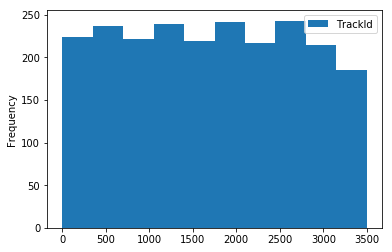

In [90]:
data_track.plot(kind='hist')

b)

In [42]:
f='''
select * from customers where FirstName like '%o%' and LastName like '%o%'
'''
cur.execute(f)
for r in cur.fetchall():
    print(r)

(23, 'John', 'Gordon', None, '69 Salem Street', 'Boston', 'MA', 'USA', '2113', '+1 (617) 522-1333', None, 'johngordon22@yahoo.com', 4)
(29, 'Robert', 'Brown', None, '796 Dundas Street West', 'Toronto', 'ON', 'Canada', 'M6J 1V1', '+1 (416) 363-8888', None, 'robbrown@shaw.ca', 3)
(51, 'Joakim', 'Johansson', None, 'Celsiusg. 9', 'Stockholm', None, 'Sweden', '11230', '+46 08-651 52 52', None, 'joakim.johansson@yahoo.se', 5)


a)

In [19]:
f='''
create table auxiliar(CustomerId INT,TrackId INT)
'''
cur.execute(f)
for r in cur.fetchall():
    print(r)

In [29]:
f='''
select invoices.CustomerId,invoice_items.TrackId from invoices 
inner join invoice_items
on invoices.InvoiceId=invoice_items.InvoiceId
'''
cur.execute(f)
lista=[]
for r in cur.fetchall():
    lista.append(r)

In [23]:
sql='''
insert into auxiliar(CustomerId,TrackId) values(?,?)
'''
cur.executemany(sql,lista)
cur.fetchall()

[]

In [33]:
f='''
select tracks.Name,customers.FirstName from auxiliar
inner join customers
on customers.CustomerId=auxiliar.CustomerId
inner join tracks
on auxiliar.TrackId=tracks.TrackId
where customers.FirstName like 'M%'
'''
cur.execute(f)
for r in cur.fetchall():
    print(r)

('Right Through You', 'Mark')
('Not The Doctor', 'Mark')
('Bleed The Freak', 'Mark')
('Confusion', 'Mark')
('Por Causa De Você', 'Mark')
('Angela', 'Mark')
('Master Of Puppets', 'Mark')
('Welcome Home (Sanitarium)', 'Mark')
('Set It Off', 'Mark')
('Knockin On Heavens Door', 'Mark')
('Wonderful Tonight', 'Mark')
('Carouselambra', 'Mark')
("I'm Gonna Crawl", 'Mark')
('Rock & Roll', 'Mark')
('Stairway To Heaven', 'Mark')
('Endgame', 'Mark')
('Country Feedback', 'Mark')
('Talk About The Passion', 'Mark')
('Green Grow The Rushes', 'Mark')
('I Believe', 'Mark')
("It's The End Of The World As We Know It (And I Feel Fine)", 'Mark')
('Onde Anda Você', 'Mark')
('Quanta (Live)', 'Mark')
('Pela Internet (Live)', 'Mark')
("Say It Loud, I'm Black And I'm Proud Pt.1", 'Mark')
("I'm Real", 'Mark')
("Whatever It Is, I Just Can't Stop", 'Mark')
('Destitute Illusions', 'Mark')
('Light Years', 'Mark')
('Are You Gonna Be My Girl', 'Mark')
('Take It Or Leave It', 'Mark')
('May This Be Love', 'Mark')
('The W

funçoes

In [70]:
#cria duas listas desempacotando tuplas
lista2=zip(*tuplasl)
listax=[]
listay=[]
h=0
for a in lista2:
    for b in a:
        if h==0:
            listax.append(b)
        else:
            listay.append(b)
    h=h+1
        